# GAN generation

In [5]:
from tgan.model import TGANModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
prices = pd.read_csv('data/log_prices.csv', index_col=0)
prices.index = pd.to_datetime(prices.index, format='%Y%m%d')
prices = prices.dropna()
prices.head()

,brn,cl,ho,xrb
date,,,,
2015-01-05,0.010676,0.025528,-0.023495,0.032481
2015-01-12,-0.039646,-0.081290,-0.008362,-0.018356
2015-01-19,0.082589,0.041151,0.022561,0.087349
2015-01-26,0.117570,0.118920,0.091463,0.075879
2015-02-02,0.056883,0.012610,0.069970,0.039044


In [8]:
tgan = TGANModel.load('gan_model.pkl')
gen_prices = tgan.sample(10000)
gen_prices['type'] = 'generated'

[0504 23:15:03 @collection.py:146] New collections created in tower : tf.GraphKeys.REGULARIZATION_LOSSES
[0504 23:15:03 @collection.py:165] These collections were modified but restored in : (tf.GraphKeys.SUMMARIES: 0->2)
[0504 23:15:03 @sessinit.py:87] WRN The following variables are in the checkpoint, but not found in the graph: global_step, optimize/beta1_power, optimize/beta2_power
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[0504 23:15:03 @sessinit.py:114] Restoring checkpoint from output/model/model-50000 ...
INFO:tensorflow:Restoring parameters from output/model/model-50000


 24%|##4       |49/200[00:01<00:03,47.24it/s]


In [9]:
prices['type'] = 'real'

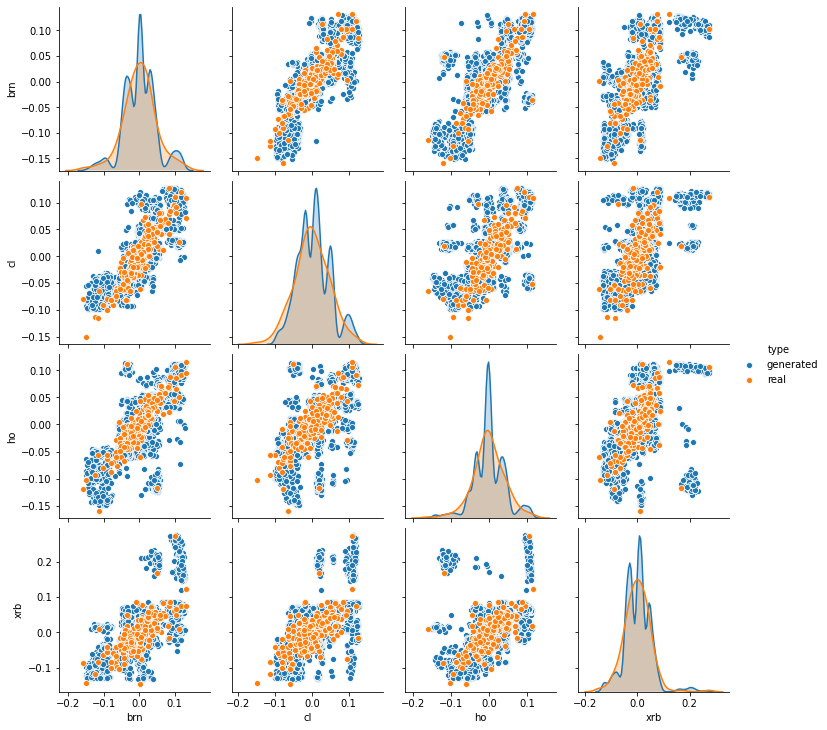

In [10]:
plot = sns.pairplot(pd.concat([gen_prices, prices]), hue="type")
plt.show()